In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D , Flatten , Dense
from keras.preprocessing.image import ImageDataGenerator

/Users/amina/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
Using TensorFlow backend.


In [2]:
classifier =Sequential()

In [3]:
### Initializing the first layer
classifier.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation = 'relu'))

In [4]:
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [5]:
classifier.add(Flatten())

In [6]:
classifier.add(Dense(units= 128 , activation = 'relu'))
classifier.add(Dense(units=1,activation = 'sigmoid'))

In [7]:
classifier.compile(optimizer = 'adam',loss='binary_crossentropy',metrics = ['accuracy'])

In [8]:
train_data = ImageDataGenerator(rescale = 1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_data = ImageDataGenerator(rescale=1./255)

In [9]:
train = train_data.flow_from_directory('images/train',target_size=(64,64),batch_size = 32,class_mode='binary')
test = test_data.flow_from_directory('images/test',target_size=(64,64),batch_size=32,class_mode='binary')

Found 13862 images belonging to 2 classes.
Found 213 images belonging to 2 classes.


In [10]:
classifier.fit_generator(train,steps_per_epoch=434,epochs = 10,validation_data=test,validation_steps=213)


Epoch 1/10
434/434 [==============================] - 77s 177ms/step - loss: 0.3282 - acc: 0.8695 - val_loss: 0.4288 - val_acc: 0.8122
Epoch 2/10
434/434 [==============================] - 93s 215ms/step - loss: 0.1960 - acc: 0.9258 - val_loss: 0.5758 - val_acc: 0.7653
Epoch 3/10
434/434 [==============================] - 96s 221ms/step - loss: 0.1540 - acc: 0.9423 - val_loss: 0.3406 - val_acc: 0.8732
Epoch 4/10
434/434 [==============================] - 83s 191ms/step - loss: 0.1404 - acc: 0.9465 - val_loss: 0.2569 - val_acc: 0.8920
Epoch 5/10
434/434 [==============================] - 95s 219ms/step - loss: 0.1380 - acc: 0.9505 - val_loss: 0.7477 - val_acc: 0.7418
Epoch 6/10
434/434 [==============================] - 90s 207ms/step - loss: 0.1359 - acc: 0.9505 - val_loss: 0.4158 - val_acc: 0.8545
Epoch 7/10
434/434 [==============================] - 89s 205ms/step - loss: 0.1265 - acc: 0.9533 - val_loss: 0.5168 - val_acc: 0.8310
Epoch 8/10
434/434 [==============================] - 8

In [11]:
import numpy as np
from keras.preprocessing import image

In [12]:
imagetest = image.load_img('images/23.jpg',target_size=(64,64))

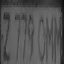

In [13]:
imagetest


In [28]:
### adding image as array
imagetest = image.img_to_array(imagetest)
## added as 3d array

In [16]:
#Modify to 1d array 
imagetest = np.expand_dims(imagetest,axis = 0)

In [17]:
train.class_indices


{'neg': 0, 'pos': 1}

In [19]:
#result = [][] 
if result[0][0]==1:
    prediction = 'pos'
else :
    prediction =='neg'

NameError: name 'result' is not defined

In [20]:
result = classifier.predict(imagetest)

In [21]:
prediction

array([[ 1.]], dtype=float32)

In [22]:
prediction = classifier.predict(imagetest)
print (prediction)

[[ 1.]]


{'neg': 0, 'pos': 1}